
 The length of the file is: 6930000 as expected from 15000 samples x 462 lines

 The length of the time array is: 15000


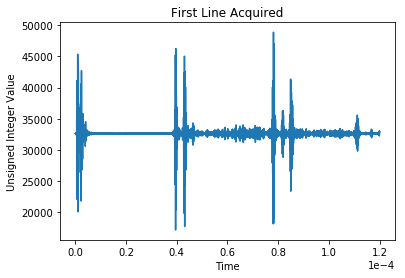

In [6]:
#we have first this command that initialize and matplotlib (library) for plotting and we specify that we want those plots inline in this notebook

# NOTE: IF YOU ARE EXECUTING FOR THE FIRST TIME RUN
%matplotlib inline
# IF YOU ARE EXECUTING FOR THE SECOND TIME IN INTERACTIVE MODE RUN
#%matplotlib nbagg

#now we import different packages that will allow to do math, lineal algebra, numerical operations, array operations and plotting
import scipy as Sci
import scipy.linalg
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt

#we use a simple open command for the file (basic Python)
f = open('UltrasoundSampleSignal.dat','rb')
#we read it using a numpy (therefore the np.) command that allows direct reading from file into an array
AllSignal = np.fromfile(f,count=-1,dtype=np.uint16)
#to verify the size of the file I am printing here the lenght of that array 
print('\n The length of the file is: ' + str(len(AllSignal)) + ' as expected from 15000 samples x 462 lines')
#we will now populate an array for the time which we now is 1/125MHz step for a total of 15000
x=np.arange(0,15000/125e6,1/125e6)  #start,stop,step
print('\n The length of the time array is: ' + str(len(x)) )
#now we plot only the first line acquired (15000 samples)
plt.plot(x,AllSignal[:15000])
plt.title('First Line Acquired')
plt.xlabel('Time')
plt.ylabel('Unsigned Integer Value')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
f.close() #close the file

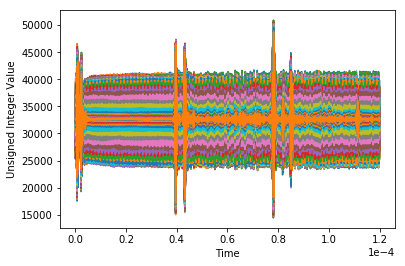

In [7]:
#We continue plotting other lines (we will plot every line and there are 462) 
totlines=np.arange(462)
for index in totlines:
    Signal=AllSignal[index*15000:(index+1)*15000]
    plt.plot(x,AllSignal[index*15000:(index+1)*15000])
    plt.xlabel('Time')
    plt.ylabel('Unsigned Integer Value')
    plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

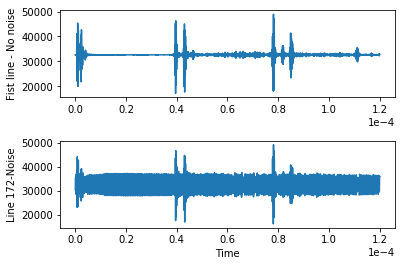

In [8]:
#The first line is clear
FirstLine=AllSignal[:15000]

#But some lines are very noisy, for instance line 172
NoisyLine=AllSignal[174*15000:(174+1)*15000]

plt.subplots_adjust( hspace = .5 )
plt.subplot(211)
plt.plot(x,FirstLine)
plt.ylabel('Fist line - No noise')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.subplot(212)
plt.plot(x,NoisyLine)
plt.xlabel('Time')
plt.ylabel('Line 172-Noise')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

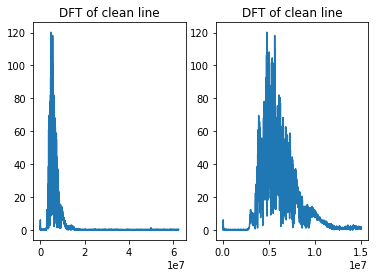

In [9]:
#we first eliminate dc
dataF=FirstLine-np.mean(FirstLine)
L=len(dataF)
#the frequencies after fft will be between 0 and 1/2 of the sampling frequency
f=np.arange(0,125e6/2,125e6/15000)
Y=np.fft.fft(dataF)
PyyClean=abs(Y)/L
#note: we are showing just L/2 elements which are the positive frequencies and we are normalizing
plt.subplot(121)
plt.plot(f, PyyClean[:7500])
plt.title('DFT of clean line')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
#Zooming into just less than 15MHz
inx=np.where(f>15e6)
inx=inx[0]
plt.subplot(122)
plt.plot(f[:inx[0]], PyyClean[:inx[0]])
plt.title('DFT of clean line')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

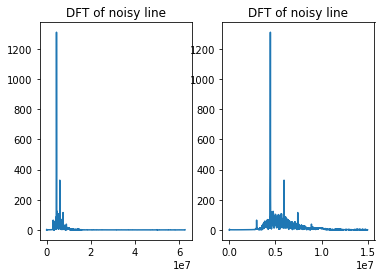

In [6]:
#now we repeat for the noisy line
#we first eliminate dc
dataN=NoisyLine-np.mean(NoisyLine)
L=len(dataN)
#the frequencies after fft will be between 0 and 1/2 of the sampling frequency
f=np.arange(0,125e6/2,125e6/15000)
Y=np.fft.fft(dataN)
PyyNoisy=abs(Y)/L
#note: we are showing just L/2 elements which are the positive frequencies and we are normalizing
plt.subplot(121)
plt.plot(f, PyyNoisy[:7500])
plt.title('DFT of noisy line')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
#Zooming into just less than 15MHz
inx=np.where(f>15e6)
inx=inx[0]
plt.subplot(122)
plt.plot(f[:inx[0]], PyyNoisy[:inx[0]])
plt.title('DFT of noisy line')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

# Assignment 2 Question 2

In [10]:
#We will determine the peak at 4.5MHz for the clean line
Cleansignal=np.amax(PyyClean)
print('Noise Thresold is : '+str(Cleansignal))


Noise Thresold is : 120.198226193


Noise Thresold is : 120.198226193
Total number of Line there amplitude above noise threshold74
Total number of Line there amplitude above noise threshold75
Total number of Line there amplitude above noise threshold83
Total number of Line there amplitude above noise threshold84
Total number of Line there amplitude above noise threshold85
Total number of Line there amplitude above noise threshold86
Total number of Line there amplitude above noise threshold87
Total number of Line there amplitude above noise threshold88
Total number of Line there amplitude above noise threshold89
Total number of Line there amplitude above noise threshold90
Total number of Line there amplitude above noise threshold91
Total number of Line there amplitude above noise threshold92
Total number of Line there amplitude above noise threshold93
Total number of Line there amplitude above noise threshold94
Total number of Line there amplitude above noise threshold95
Total number of Line there amplitude above noise th

Total number of Line there amplitude above noise threshold293
Total number of Line there amplitude above noise threshold294
Total number of Line there amplitude above noise threshold295
Total number of Line there amplitude above noise threshold296
Total number of Line there amplitude above noise threshold297
Total number of Line there amplitude above noise threshold298
Total number of Line there amplitude above noise threshold299
Total number of Line there amplitude above noise threshold300
Total number of Line there amplitude above noise threshold301
Total number of Line there amplitude above noise threshold302
Total number of Line there amplitude above noise threshold303
Total number of Line there amplitude above noise threshold304
Total number of Line there amplitude above noise threshold305
Total number of Line there amplitude above noise threshold306
Total number of Line there amplitude above noise threshold307
Total number of Line there amplitude above noise threshold308
Total nu

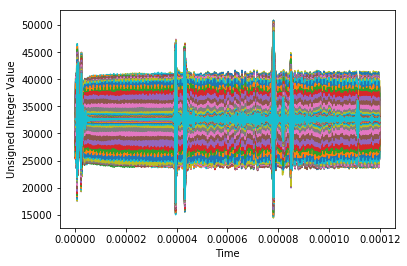

In [19]:
#We will determine the peak at 4.5MHz for the clean line
Cleansignal=np.amax(PyyClean)
print('Noise Thresold is : '+str(Cleansignal))
p=np.arange(0,15000/125e6,1/125e6)
totlines=np.arange(462)
i=0
for index in totlines:
    ladata=AllSignal[index*15000:(index+1)*15000]-np.mean(AllSignal[index*15000:(index+1)*15000])
    L=len(ladata)
    Y=np.fft.fft(ladata)
    Pyy=abs(Y)/L
    Amp=np.amax(Pyy)   
    if Amp>120.2:     
        
        i=i+1
        Signal=AllSignal[index*15000:(index+1)*15000]
        plt.plot(p,AllSignal[index*15000:(index+1)*15000]) 
        plt.xlabel('Time')
        plt.ylabel('Unsigned Integer Value')
        plt.ticklabel_format(style='sci', axis='b', scilimits=(0,0))
        print "Total number of Line there amplitude above noise threshold" +str(index)   
        
print "So,Total Number of Noise lines that we have  " + str(i)